In [ ]:
###### FILE INFO #####
#
# Project 3  : Multivariate Analysis of Pepsico's Revenue
# Course     : BA222
# Instructor : Carlos Cassó Domínguez
#
######################

In [186]:
###### LOADING PACKAGES #####

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col

######################

In [127]:
###### PART I: DATA AND OBJECTIVE #####

pep = pd.read_csv("/Users/jacobrose/Documents/BA222/Project 3/Pepsico Income Statement Data.csv")

print(pep.shape)
print(pep.columns)
pep.head()

(86, 5)
Index(['report_date', 'year', 'quarter', 'revenue', 'time'], dtype='object')


,report_date,year,quarter,revenue,time
0,12/27/2014,2014,4,19948000,86
1,09/06/2014,2014,3,17218000,85
2,06/14/2014,2014,2,16894000,84
3,03/22/2014,2014,1,12623000,83
4,12/28/2013,2013,4,20118000,82


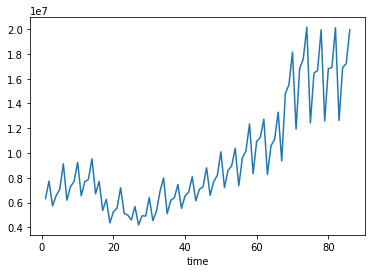

In [130]:
###### QUICK OVERVIEW OF THE REVENUE ######

pep[["time", "revenue"]].groupby("time").mean().plot(legend = False)
plt.show()

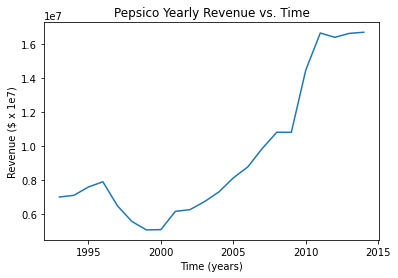

In [191]:
###### AVERAGE PER YEAR ######

pep[["year", "revenue"]].groupby("year").mean().plot(legend = False)
plt.xlabel("Time (years)")
plt.ylabel("Revenue ($ x 1e7)")
plt.title("Pepsico Yearly Revenue vs. Time")
plt.savefig("Pepsico.png")

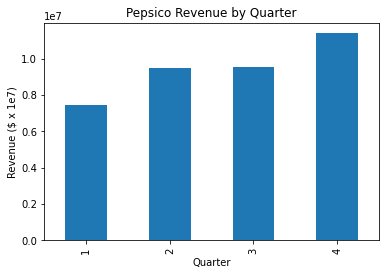

In [193]:
###### AVERAGE PER QUARTER ######

pep[["quarter", "revenue"]].groupby("quarter").mean().plot(kind = "bar", legend = False)
plt.xlabel("Quarter")
plt.ylabel("Revenue ($ x 1e7)")
plt.title("Pepsico Revenue by Quarter")
plt.savefig("PepsicoRevbyQ.png")

In [ ]:
###### PATTERNS ######

# TIME TREND?
# SEASONALITY?
# ANY IMPORTANT OUTLIER?


/var/folders/h4/71xsrmbx1f3btkbkz27p91m00000gn/T/ipykernel_86125/4069418716.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sb.regplot(x = "time", y = "revenue", data = pep[17 <= pep.time][pep.time < 23])
/var/folders/h4/71xsrmbx1f3btkbkz27p91m00000gn/T/ipykernel_86125/4069418716.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sb.regplot(x = "time", y = "revenue", data = pep[23 <= pep.time][pep.time <= 67])


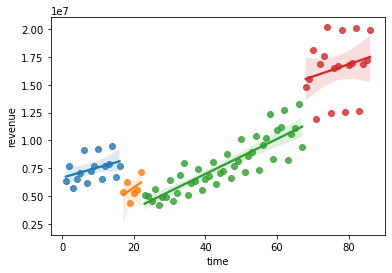

In [157]:
###### REGPLOT ######

# Maybe there are four different time trends in the data
sb.regplot(x = "time", y = "revenue", data = pep[pep.time < 17])
sb.regplot(x = "time", y = "revenue", data = pep[17 <= pep.time][pep.time < 23])
sb.regplot(x = "time", y = "revenue", data = pep[23 <= pep.time][pep.time <= 67])
sb.regplot(x = "time", y = "revenue", data = pep[pep.time > 67])
plt.show()

In [158]:
###### IDENTIFYING TIME TRENDS ######

reg_bef = smf.ols("revenue ~ time", data = pep[pep.time < 17]).fit()
reg_bet = smf.ols("revenue ~ time", data = pep[17 <= pep.time][pep.time < 23]).fit()
reg_bet1 = smf.ols("revenue ~ time", data = pep[23 <= pep.time][pep.time <= 67]).fit()
reg_aft = smf.ols("revenue ~ time", data = pep[pep.time > 67]).fit()

summary_col([reg_bef, reg_bet, reg_bet1, reg_aft], stars = True)

/var/folders/h4/71xsrmbx1f3btkbkz27p91m00000gn/T/ipykernel_86125/1999214841.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  reg_bet = smf.ols("revenue ~ time", data = pep[17 <= pep.time][pep.time < 23]).fit()
/var/folders/h4/71xsrmbx1f3btkbkz27p91m00000gn/T/ipykernel_86125/1999214841.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  reg_bet1 = smf.ols("revenue ~ time", data = pep[23 <= pep.time][pep.time <= 67]).fit()


,revenue I,revenue II,revenue III,revenue IIII
Intercept,6657085.0000***,1246200.0000,706421.8270,8025803.5088
,(562676.4040),(4548985.9008),(634379.1630),(8590606.5480)
time,91712.0588,226400.0000,157084.4532***,110098.2456
,(58190.6084),(232391.7628),(13544.5191),(111285.1296)
R-squared,0.1507,0.1918,0.7578,0.0544
R-squared Adj.,0.0900,-0.0103,0.7521,-0.0012


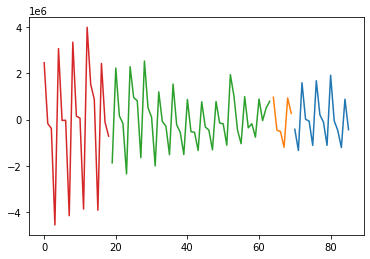

In [159]:
###### LET'S TAKE A LOOK AT THE RESIDUALS ######

# To get the residuals use the .resid attribute of the estimated regression

reg_bef.resid.plot()
reg_bet.resid.plot()
reg_bet1.resid.plot()
reg_aft.resid.plot()

plt.show()

In [160]:
###### ESTIMATING SEASONAL EFFECTS ######

reg_bef = smf.ols("revenue ~ C(quarter)", data = pep[pep.time < 17]).fit()
reg_bet = smf.ols("revenue ~ C(quarter)", data = pep[17 <= pep.time][pep.time < 23]).fit()
reg_bet1 = smf.ols("revenue ~ C(quarter)", data = pep[23 <= pep.time][pep.time <= 67]).fit()
reg_aft = smf.ols("revenue ~ C(quarter)", data = pep[pep.time > 67]).fit()

summary_col([reg_bef, reg_bet, reg_bet1, reg_aft], stars = True)

# CANNOT IDENTIFY SEASONALITY WITHOUT CONTROLLING FOR TIME TREND

/var/folders/h4/71xsrmbx1f3btkbkz27p91m00000gn/T/ipykernel_86125/538116199.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  reg_bet = smf.ols("revenue ~ C(quarter)", data = pep[17 <= pep.time][pep.time < 23]).fit()
/var/folders/h4/71xsrmbx1f3btkbkz27p91m00000gn/T/ipykernel_86125/538116199.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  reg_bet1 = smf.ols("revenue ~ C(quarter)", data = pep[23 <= pep.time][pep.time <= 67]).fit()


,revenue I,revenue II,revenue III,revenue IIII
Intercept,6293925.0000***,4353000.0000**,6475833.3333***,12392250.0000***
,(318750.7763),(477255.9586),(633337.4614),(383039.7532)
C(quarter)[T.2],1016275.0000**,905000.0000,1016621.2121,3965150.0000***
,(450781.6709),(674941.8493),(915804.4562),(513901.7557)
C(quarter)[T.3],941200.0000*,1100000.0000,1387621.2121,4382750.0000***
,(450781.6709),(584516.7876),(915804.4562),(513901.7557)
C(quarter)[T.4],2613375.0000***,2371500.0000*,2911439.3939***,7274350.0000***
,(450781.6709),(584516.7876),(915804.4562),(513901.7557)
R-squared,0.7430,0.9026,0.2015,0.9306
R-squared Adj.,0.6788,0.7565,0.1431,0.9168


In [161]:
###### ESTIMATING SEASONAL EFFECTS AND TIME TREND######

reg_bef = smf.ols("revenue ~ time + C(quarter)", data = pep[pep.time < 17]).fit()
reg_bet = smf.ols("revenue ~ time + C(quarter)", data = pep[17 <= pep.time][pep.time < 23]).fit()
reg_bet1 = smf.ols("revenue ~ time + C(quarter)", data = pep[23 <= pep.time][pep.time <= 67]).fit()
reg_aft = smf.ols("revenue ~ time + C(quarter)", data = pep[pep.time > 67]).fit()

summary_col([reg_bef, reg_bet, reg_bet1, reg_aft], stars = True)

/var/folders/h4/71xsrmbx1f3btkbkz27p91m00000gn/T/ipykernel_86125/3271965595.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  reg_bet = smf.ols("revenue ~ time + C(quarter)", data = pep[17 <= pep.time][pep.time < 23]).fit()
/var/folders/h4/71xsrmbx1f3btkbkz27p91m00000gn/T/ipykernel_86125/3271965595.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  reg_bet1 = smf.ols("revenue ~ time + C(quarter)", data = pep[23 <= pep.time][pep.time <= 67]).fit()


,revenue I,revenue II,revenue III,revenue IIII
Intercept,5282595.0000***,1695375.0000,-489581.5715,6038375.0000***
,(195573.7399),(1832431.0398),(374971.2563),(1965402.7019)
C(quarter)[T.2],903905.0000***,765125.0000,1171408.2100***,4047667.8571***
,(195573.7399),(542143.0998),(264328.0914),(401285.2905)
C(quarter)[T.3],1165940.0000***,1100000.0000,1387621.2121***,4382750.0000***
,(197387.4456),(462341.1890),(264227.9228),(400491.4514)
C(quarter)[T.4],2725745.0000***,2231625.0000,2756652.3961***,7191832.1429***
,(195573.7399),(471875.0000),(264328.0914),(401285.2905)
time,112370.0000***,139875.0000,154786.9979***,82517.8571***
,(15413.3700),(94375.0000),(7276.3101),(25228.5901)


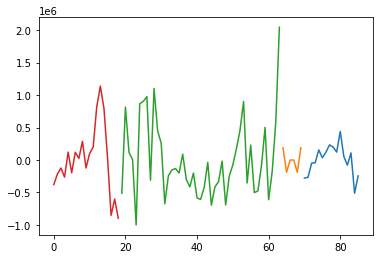

In [162]:
###### LET'S TAKE A LOOK AT THE RESIDUALS ONE MORE TIME ######

# To get the residuals use the .resid attribute of the estimated regression

reg_bef.resid.plot()
reg_bet.resid.plot()
reg_bet1.resid.plot()
reg_aft.resid.plot()

plt.show()

# THERE IS STILL A BIG OUTLIER

In [168]:
###### IDENTIFYING OUTLIERS ######

# print(reg_aft.resid[reg_aft.resid.max() == reg_aft.resid])
print(reg_bet1.resid[reg_bet1.resid.max() == reg_bet1.resid])

# OBSERVATION 1 is the outlier

# pep.loc[13,]
pep.loc[63,]

# Year = 1993, Quarter = 3
# Why do you think retail sales went down on Y1993Q3?

# We are going to create a dummy for that outlier
# that should take care of it

# pep["outlier"] = 0
# pep.loc[13,"outlier"] = 1
pep.loc[63,"outlier"] = 1

63    2.043481e+06
dtype: float64


In [170]:
###### ESTIMATING SEASONAL EFFECTS AND TIME TREND AND CONTROLLIN FOR OUTLIER######

reg_bef = smf.ols("revenue ~ time + C(quarter)", data = pep[pep.time < 17]).fit()
reg_bet = smf.ols("revenue ~ time + C(quarter)", data = pep[17 <= pep.time][pep.time < 23]).fit()
reg_bet1 = smf.ols("revenue ~ time + C(quarter) + outlier", data = pep[23 <= pep.time][pep.time <= 67]).fit()
reg_aft = smf.ols("revenue ~ time + C(quarter) + outlier", data = pep[pep.time > 67]).fit()

summary_col([reg_bef, reg_bet, reg_bet1, reg_aft], stars = True)

/var/folders/h4/71xsrmbx1f3btkbkz27p91m00000gn/T/ipykernel_86125/1211203032.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  reg_bet = smf.ols("revenue ~ time + C(quarter)", data = pep[17 <= pep.time][pep.time < 23]).fit()
/var/folders/h4/71xsrmbx1f3btkbkz27p91m00000gn/T/ipykernel_86125/1211203032.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  reg_bet1 = smf.ols("revenue ~ time + C(quarter) + outlier", data = pep[23 <= pep.time][pep.time <= 67]).fit()


,revenue I,revenue II,revenue III,revenue IIII
C(quarter)[T.2],903905.0000***,765125.0000,1378078.4091***,4058196.2963***
,(195573.7399),(542143.0998),(228592.3908),(339392.5186)
C(quarter)[T.3],1165940.0000***,1100000.0000,1587325.0000***,4087953.7037***
,(197387.4456),(462341.1890),(228148.6079),(357677.8093)
C(quarter)[T.4],2725745.0000***,2231625.0000,2949389.7727***,7181303.7037***
,(195573.7399),(471875.0000),(227881.9232),(339392.5186)
Intercept,5282595.0000***,1695375.0000,-1002773.8636***,5227685.1852***
,(195573.7399),(1832431.0398),(339845.5095),(1691947.7523)
R-squared,0.9559,0.9695,0.9550,0.9739
R-squared Adj.,0.9399,0.8477,0.9492,0.9638


In [182]:
reg_aftsum = smf.ols("revenue ~ time + C(quarter) + outlier", data = pep[pep.time > 67]).fit().summary()
reg_aftsum

/Users/jacobrose/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     96.97
Date:                Sun, 01 May 2022   Prob (F-statistic):           8.02e-10
Time:                        17:35:07   Log-Likelihood:                -272.86
No. Observations:                  19   AIC:                             557.7
Df Residuals:                      13   BIC:                             563.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.228e+06   1.69e+06      3.090      0.009    1.57e+06    8.88e+06
C(quarter)[T.2]  4.058e+06   3.39e+05     11.957      0.000    3.32e+06    4.79e+06
C(quarter)[T.3]  4.088e+06   3.58e+05     11.429      0.000    3.32e+06    4.86e+06
C(quarter)[T.4]  7.181e+06   3.39e+05     21.159      0.000    6.45e+06    7.91e+06
time             9.305e+04   2.17e+04      4.282      0.001    4.61e+04     1.4e+05
outlier          1.474e+06   5.75e+05      2.564      0.024    2.32e+05    2.72e+06
==============================================================================
Omnibus:                        0.965   Durbin-Watson:                   1.317
Prob(Omnibus):                  0.617   Jarque-Bera (JB):                0.108
Skew:                           0.103   Prob(JB):                        0.947
Kurtosis:                       3.307   Cond. No.                     1.13e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

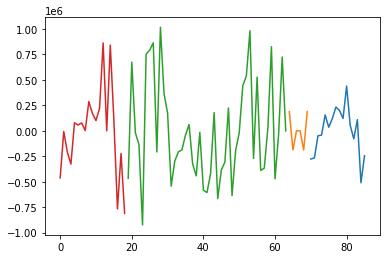

In [171]:
###### LET'S TAKE A LOOK AT THE RESIDUALS ######

# To get the residuals use the .resid attribute of the estimated regression

reg_bef.resid.plot()
reg_bet.resid.plot()
reg_bet1.resid.plot()
reg_aft.resid.plot()

plt.show()


# MUCH BETTER!
# THERE STILL SEEMS TO BE A PATTERN, BUT IS NOT 
# A TIME TREND AND NOT A QUARTERLY EFFECT

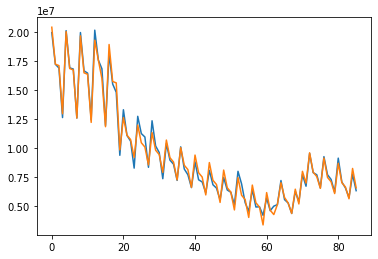

In [172]:
###### FORECASTING ######

# FITTED VALUES - IN SAMPLE -

pep["fitted"] = None
pep.loc[pep.time < 17, "fitted"] = reg_bef.predict()
pep.loc[(17 <= pep.time) & (pep.time < 23), "fitted"] = reg_bet.predict()
pep.loc[(23 <= pep.time) & (pep.time <= 67), "fitted"] = reg_bet1.predict()
pep.loc[pep.time > 67, "fitted"] = reg_aft.predict()


pep.revenue.plot()
pep.fitted.plot()
plt.show()

In [174]:
###### FORECASTING ######

# - OUT OF SAMPLE -

# MAKING DATA FOR FOUR PERIODS OUT OF SAMPLE

pep_oos = pd.DataFrame(data = {"time" : [87, 88, 89, 90],\
                               "quarter" : [1, 2, 3, 4],\
                               "outlier" : [0,0,0,0]} )
pep_oos

,time,quarter,outlier
0,87,1,0
1,88,2,0
2,89,3,0
3,90,4,0


In [176]:
# Prediction
reg_aft.predict(pep_oos)

0    1.332271e+07
1    1.747396e+07
2    1.759676e+07
3    2.078316e+07
dtype: float64

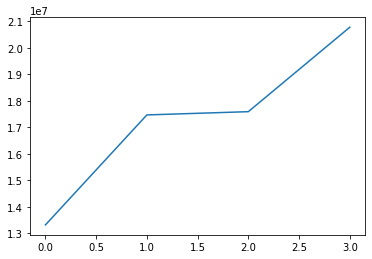

In [177]:
# Graph
pep_oos["forecast"] = reg_aft.predict(pep_oos)
pep_oos.forecast.plot()
plt.show()

In [178]:
###### CONFIDENCE INTERVAL OF PREDICTIONS #####

# The .get_prediction() method produces both the
# prediction and a confidence interval for the prediction

# To get it in data frame format we add the .summary_frame() method

reg_aft.get_prediction(pep_oos).summary_frame()

# This will produce the "mean" which is the prediction
# - mean_se       : is the standard error of the prediction
# - mean_ci_lower : is the lower value of the confidence interval
# - mean_ci_upper : is the lower upper of the confidence interval

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,1.332271e+07,333074.421778,1.260315e+07,1.404228e+07,1.201598e+07,1.462944e+07
1,1.747396e+07,344911.457967,1.672882e+07,1.821909e+07,1.615297e+07,1.879494e+07
2,1.759676e+07,347638.073187,1.684573e+07,1.834779e+07,1.627244e+07,1.892108e+07
3,2.078316e+07,344911.457967,2.003802e+07,2.152829e+07,1.946217e+07,2.210414e+07


In [179]:
# The default significance level is 0.05 for a 95% confidence interval
# you can change this value to get different size confidence intervals

reg_aft.get_prediction(pep_oos).summary_frame(alpha = 0.1)

# At alpha 0.1 (90% CI) the confidence interval is more narrow

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,1.332271e+07,333074.421778,1.273286e+07,1.391257e+07,1.225154e+07,1.439389e+07
1,1.747396e+07,344911.457967,1.686314e+07,1.808477e+07,1.639110e+07,1.855682e+07
2,1.759676e+07,347638.073187,1.698112e+07,1.821240e+07,1.651117e+07,1.868235e+07
3,2.078316e+07,344911.457967,2.017234e+07,2.139397e+07,1.970030e+07,2.186602e+07


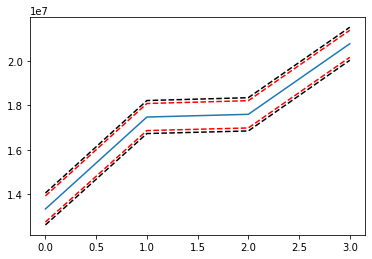

In [180]:
### COMPARISON OF 90% VS 95% CI

forecast_95 = reg_aft.get_prediction(pep_oos).summary_frame(alpha = 0.05)
forecast_90 = reg_aft.get_prediction(pep_oos).summary_frame(alpha = 0.1)

forecast_95.mean_ci_lower.plot(color = "black", linestyle = "dashed") 
forecast_95.mean_ci_upper.plot(color = "black", linestyle = "dashed")
forecast_90.mean_ci_lower.plot(color = "red", linestyle = "dashed")
forecast_90.mean_ci_upper.plot(color = "red", linestyle = "dashed")
forecast_90["mean"].plot()
plt.show()